# **HW2: Decision Tree** 
In *assignment 2*, you need to:

1.   Implement the decision tree in 3 steps (with the example data)


*   Step 1: calculate the entropy
*   Step 2: search for the best split
*   Step 3: build the decision tree

2.   Predict the patients' death (hospDIED) in the *MIMIC* dataset

Please fill in your **studentID** here.

In [369]:
STUDENT_ID = '108062135'

# **1. Implement the Decision Tree**
In the first part, you need to implement the decision tree by completing the given funcitions.

Also, you need to run those functions with given input variables and save the output to the implementation csv file **[STUDENT_ID]_implementation.csv**.

Implement a binary decision tree to classify *Restaurant* dataset.

## Import Packages

Note: You **cannot** import any other packages in the first part (implementation)!

In [370]:
import numpy as np
import pandas as pd
import random

## Load the Example Data
First, load the *Restaurant waiting* dataset: **data.csv**

In [371]:
example = pd.read_csv('https://raw.githubusercontent.com/aubreyyy24/HW2_data/main/data.csv')
example

,Unnamed: 0,Alternate,Bar,Friday,Hungry,Patrons,Price,Raining,Reservation,Type,WaitEstimate,Wait
0,X1,T,F,F,T,Some,High,F,T,French,8,T
1,X2,T,F,F,T,Full,Low,F,F,Thai,40,F
2,X3,F,T,F,F,Some,Low,F,F,Burger,8,T
3,X4,T,F,T,T,Full,Low,F,F,Thai,12,T
4,X5,T,F,T,F,Full,High,F,T,French,70,F
5,X6,F,T,F,T,Some,Medium,T,T,Italian,3,T
6,X7,F,T,F,F,None,Low,T,F,Burger,7,F
7,X8,F,F,F,T,Some,Medium,T,T,Thai,6,T
8,X9,F,T,T,F,Full,Low,T,F,Burger,80,F
9,X10,T,T,T,T,Full,High,F,T,Italian,20,F


In [372]:
example = example.drop(['Unnamed: 0'], axis=1)

In [373]:
# change the string categorical to integer labels
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

example['Alternate'] = labelencoder.fit_transform(example['Alternate'])
example['Bar'] = labelencoder.fit_transform(example['Bar'])
example['Friday'] = labelencoder.fit_transform(example['Friday'])
example['Hungry'] = labelencoder.fit_transform(example['Hungry'])
example['Patrons'] = labelencoder.fit_transform(example['Patrons'])
example['Price'] = labelencoder.fit_transform(example['Price'])
example['Raining'] = labelencoder.fit_transform(example['Raining'])
example['Reservation'] = labelencoder.fit_transform(example['Reservation'])
example['Type'] = labelencoder.fit_transform(example['Type'])

example

,Alternate,Bar,Friday,Hungry,Patrons,Price,Raining,Reservation,Type,WaitEstimate,Wait
0,1,0,0,1,2,0,0,1,1,8,T
1,1,0,0,1,0,1,0,0,3,40,F
2,0,1,0,0,2,1,0,0,0,8,T
3,1,0,1,1,0,1,0,0,3,12,T
4,1,0,1,0,0,0,0,1,1,70,F
5,0,1,0,1,2,2,1,1,2,3,T
6,0,1,0,0,1,1,1,0,0,7,F
7,0,0,0,1,2,2,1,1,3,6,T
8,0,1,1,0,0,1,1,0,0,80,F
9,1,1,1,1,0,0,0,1,2,20,F


## Calculating the Entropy *(20%)*


In [374]:
# split the data by given attribute and its threshold
def partition(data, column, threshold):
  """
  The *partition* function will split the input data into 2 branches.
    args:
    *   data(DataFrame): the input data
    *   column(str): the attribute(column name)
    *   threshold(float): the column's threshold for splitting the data
    returns:
    *   match_branch(DataFrame): the divided data that matches the assigned column's threshold
    *   false_branch(DataFrame): the divided data that doesn't match the assigned column's threshold
  """
  match_branch = data[data[column] <= threshold]
  false_branch = data[data[column] > threshold]
  return match_branch, false_branch

If we try *partition(example, 'Patrons', 1.5)*:

split example to 

match_left(Patrons<= 1.5) (Patrons != Some) and  
false_right(Patrons > 1.5) (Patrons == Some)

column: Patrons, threshold: 1.5



In [375]:
match_left, false_right = partition(example, 'Patrons', 1.5)
print(match_left.shape)
print(false_right.shape)
match_left.head()

(8, 11)
(4, 11)


,Alternate,Bar,Friday,Hungry,Patrons,Price,Raining,Reservation,Type,WaitEstimate,Wait
1,1,0,0,1,0,1,0,0,3,40,F
3,1,0,1,1,0,1,0,0,3,12,T
4,1,0,1,0,0,0,0,1,1,70,F
6,0,1,0,0,1,1,1,0,0,7,F
8,0,1,1,0,0,1,1,0,0,80,F


In [376]:
def entropy(data):
  """
  The *entropy* function will calculate the entropy of the node(data)
  args:
  *    data(DataFrame): the data you're calculating for the entropy
  output:
  *    entropy(float): the node(data)'s entropy     
  """
  if len(data) == 0:
    return 69
  yes = 0
  no = 0
  for i in data['Wait']:
    if i == 'T':
      yes +=1
    else:
      no +=1
  p = float(yes/len(data))
  if(p == 0 or p == 1):
    entropy = 0
  else:
    entropy = -p*np.log2(p)-(1-p)*np.log2(1-p)
  return entropy

An example of the output from entropy (Use this to check if your output is correct): 

In [377]:
match, false = partition(example, 'Hungry', 0.5)
match
entropy1 = entropy(match)
print(entropy1)

0.7219280948873623


In [378]:
#implementation 1: calculate the entropy of 'false_right' data
ans_entropy = entropy(false)

## Find the Best Split *(20%)*

In [386]:
# search for the best attribute and the value(threshold) to split the data
def findBestSplit(data):
    """
    The *findBestSplit* function finds the best combination of attribute and value(with the largest reduction in entropy) to split the data.
    args:
    *   data(DataFrame): the data you try to split(build the decision tree)
    output:
    *   column_best(str): the attribute(column) split with the largest reduction in entropy
    *   value_best(float): the value(threshold) of the column_best attribute to split the data
    """
    all_entropy = 9999        #the overall entropy : save the value of the smallest entropy
    column_best = 0
    value_best = 0
    for i in data:
      if i == 'Wait':
        continue
      for j in data[i].sort_values().unique():
        match, false = partition(data, i, float(j+0.5))
        entropy_total = float((len(match)/len(data))*entropy(match)+(len(false)/len(data))*entropy(false))  
        if entropy_total < all_entropy:
            column_best = i;
            value_best = j+0.5
            all_entropy = entropy_total
    return column_best, value_best
  

An example of the output from findBestSplit (Use this to check if your output is correct):

In [387]:
column_best, value_best = findBestSplit(match)
print(column_best)
print(value_best)

Patrons
1.5


In [388]:
#implementation 2: Find the best split of the 'match' data
ans_column, ans_value = findBestSplit(false)

## Decision Tree Building *(30%)*

Use the above functions to help building the decision tree





In [389]:
def buildTree(data, depth):
  """
  The *buildTree* function builds the decision tree
  args:
  *     df(DataFrame): the data you want to apply the decision tree
  *     depth(int) : the depth of your tree
  output:
  *     decisionSubTree(dict): the decision tree structure including root, branch, leaf(with the attributes and thresholds)
  *     features(list): the features(attributes) name in the decision tree structure(from root to branch and leaf)
  *     thresholds(list): the corresponding thresholds for the features in the 'features' list
  """
  features = []
  thresholds = []
  column_best, value_best = findBestSplit(data)
  features.append(column_best)
  thresholds.append(value_best)
    
  numT = 0
  numN = 0
  for idx, row in data.iterrows():
    if row['Wait'] == 'T':
      numT += 1
    else:
      numN += 1
  if numT == data.shape[0]:
    return 'T', [], []
  if numN == data.shape[0]:
    return 'F', [], []
  if(depth == 1):
    if numT > numN:
      return 'T', [],[]
    else:
      return 'F', [],[]
    
  match_left ,false_right = partition(data, column_best, value_best)
  ltree, lfeatures, lthresholds = buildTree(match_left, depth-1)
  rtree, rfeatures, rthresholds = buildTree(false_right, depth-1)
  features = features + lfeatures + rfeatures
  thresholds = thresholds + lthresholds + rthresholds
  decisionSubTree = [column_best, value_best, ltree, rtree]
  return decisionSubTree, features, thresholds
  
  

An example of the output from buildTree (Use this to check if your output is correct): 

In [390]:
tree, features, thresholds= buildTree(example, 2)
print(tree)
print(features)
print(thresholds)

['Patrons', 1.5, 'F', 'T']
['Patrons']
[1.5]


In [391]:
#implementation 3: decision tree building (depth=10)
ans_tree, ans_features, ans_thresholds = buildTree(example,10)
print(ans_tree)
print(ans_features)
print(ans_thresholds)

['Patrons', 1.5, ['Hungry', 0.5, 'F', ['Friday', 0.5, 'F', ['Price', 0.5, 'F', 'T']]], 'T']
['Patrons', 'Hungry', 'Friday', 'Price']
[1.5, 0.5, 0.5, 0.5]


In [392]:
#save implementation csv
ans_path = STUDENT_ID + '_implementation.csv'

imp = []
imp.append(ans_entropy)
imp.append(ans_column)
imp.append(ans_value)
for i in range(len(ans_features)):
  imp.append(ans_features[i])
for m in range(len(ans_thresholds)):
  imp.append(ans_thresholds[m])
print(imp)
pd.DataFrame(imp).to_csv(ans_path, header = None, index = None)

[0.863120568566631, 'WaitEstimate', 12.5, 'Patrons', 'Hungry', 'Friday', 'Price', 1.5, 0.5, 0.5, 0.5]


# **2. Classification with the MIMIC Dataset**
In the second part, you need to classify **'hospDIED'(death)** in the MIMIC dataset.

Please put the classification result in a csv file. (**[STUDENTID]_prediction.csv**)

**Note:** Decision tree is recommended but not mandatory.

## Prediction (Performance) *(20%)*

The **y_test** (hospDIED) of this data is hidden, you need to use the x_test.csv to predict the y_test.

**Note:** You **can** now import the packages you need here!

Get the MIMIC data here!

Data Description: 

[Data Description](https://docs.google.com/spreadsheets/d/1pxqxQFhIcv_hrgWEtwhXE6zBVQ5ISa-13PIhvXMtWCY/edit?usp=sharing) (You can find the data description here.)

**Note:**
*   You can select the features you want to use.
*   You can use any ML models to predict the y_test.

  (However, there is a 10% bonus if you **visualize** the decision tree in this part)


[ref]: *Johnson, A. E. W., Pollard, T. J., Shen, L., Lehman, L. H., Feng, M., Ghassemi, M., Moody, B., Szolovits, P., Celi, L. A., & Mark, R. G. (2016). MIMIC-III, a freely accessible critical care database. Scientific Data, 3, 160035.*


In [393]:
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [394]:
#Read data
x_train = pd.read_csv('https://raw.githubusercontent.com/aubreyyy24/HW2_data/main/x_train.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/aubreyyy24/HW2_data/main/y_train.csv')
x_train = x_train.drop(['subject_id', 'indextime'], axis = 1)
x_train.head()

,age,los,CA,DNR,CMO,DNI,female,first_careunit,insurance,ethnicity,...,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,48,1.826250,0,0,0,0,1,10,1,6,...,2,9,9,9,9,0,9,9,0,9
1,59,10.581123,0,0,0,0,1,10,1,4,...,4,4,4,4,4,4,4,4,4,4
2,73,2.065255,0,0,0,0,1,4,1,4,...,4,4,4,4,4,4,4,4,4,4
3,84,1.435428,0,0,0,0,1,10,3,4,...,0,9,9,0,9,0,9,1,9,9
4,66,1.443414,0,0,0,0,0,1,1,4,...,4,4,4,4,4,4,4,4,4,4


Complete your model with validation:

In [65]:
#Split the data into training and validation sets
#Build you model and evaluate it on your validation set
train_dataX = x_train.sample(frac = 0.8, random_state=1)
train_dataY= y_train.sample(frac = 0.8, random_state=1)
valid_dataX = x_train.drop(train_dataX.index)
valid_dataY = y_train.drop(train_dataY.index)
tree_model = DecisionTreeClassifier(random_state = 42)
tree_model = tree_model.fit(train_dataX, train_dataY)

Make the final prediction from your model:

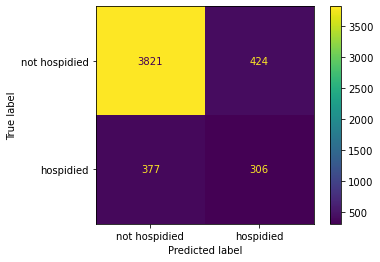

In [66]:
plot_confusion_matrix(tree_model, valid_dataX, valid_dataY, display_labels=['not hospidied', 'hospidied'])

In [68]:
path = tree_model.cost_complexity_pruning_path(train_dataX, train_dataY)
alphas = path.ccp_alphas
alphas = alphas[:-1]  #use cost complexity pruning, but remove the max value(with just the root)
tree_list = []
for i in alphas:
  tree_model = DecisionTreeClassifier(random_state = 0, ccp_alpha = i)
  tree_model.fit(train_dataX, train_dataY)
  tree_list.append(tree_model)

798


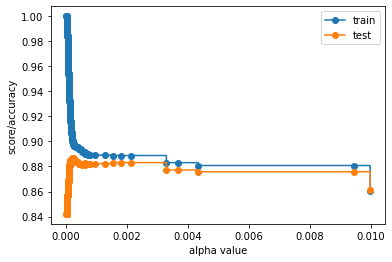

In [86]:
train_scores = [i.score(train_dataX, train_dataY) for i in tree_list]
test_scores = [i.score(valid_dataX, valid_dataY) for i in tree_list]
max = -1
idx = 0
for i in test_scores:
  if i > max:
    max = i
    idx = test_scores.index(i)
print(idx)
fig, ax = plt.subplots()
ax.set_xlabel("alpha value")
ax.set_ylabel("score/accuracy")
ax.plot(alphas, train_scores, marker = 'o', label = 'train', drawstyle= 'steps-post')
ax.plot(alphas, test_scores, marker = 'o', label = 'test', drawstyle= 'steps-post')
ax.legend()
plt.show()


In [87]:
print(alphas[idx])
print(test_scores[idx])

0.00023528997194835347
0.8865665584415584


<AxesSubplot:xlabel='tree'>

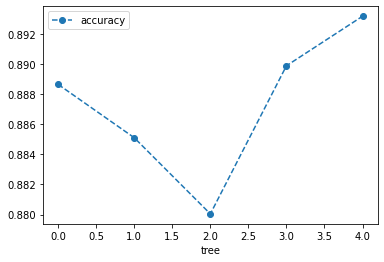

In [91]:
tree = DecisionTreeClassifier(random_state = 69, ccp_alpha = 0.00023528997194835347)

scores = cross_val_score(tree, train_dataX, train_dataY, cv = 5)
df = pd.DataFrame(data={'tree':range(5), 'accuracy':scores})
df.plot(x = 'tree', y = 'accuracy', marker='o', linestyle = '--')

In [93]:
alpha_loop_values = []
for i in alphas:
  tree = DecisionTreeClassifier(random_state = 0,ccp_alpha = i)
  scores = cross_val_score(tree, train_dataX, train_dataY, cv = 5)
  alpha_loop_values.append([i, np.mean(scores), np.std(scores)])


<AxesSubplot:xlabel='alpha'>

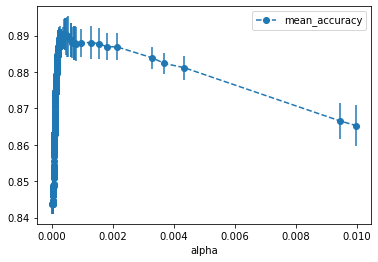

In [111]:
alpha_results= pd.DataFrame(alpha_loop_values, columns = ['alpha', 'mean_accuracy', 'std'])
alpha_results.plot(x = 'alpha',
                   y = 'mean_accuracy',
                   yerr = 'std',
                   marker = 'o',
                   linestyle ='--')

In [119]:
alpha_results[(alpha_results['alpha']>0.00025) & (alpha_results['alpha'] < 0.00035)]

,alpha,mean_accuracy,std
803,0.000253,0.887993,0.004700
804,0.000257,0.887232,0.003983
805,0.000266,0.887739,0.003614
806,0.000282,0.889109,0.002505
807,0.000282,0.889109,0.002505
808,0.000286,0.889109,0.002721
809,0.000287,0.889109,0.002721
810,0.000290,0.889413,0.002436
811,0.000291,0.889413,0.002436
812,0.000295,0.889413,0.002436


In [395]:
ideal_alpha =  0.000290 

In [402]:
final_pruned_tree = DecisionTreeClassifier(random_state = 42, ccp_alpha = ideal_alpha)
final_pruned_tree = final_pruned_tree.fit(x_train, y_train)

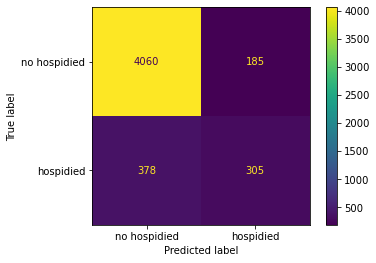

In [403]:
plot_confusion_matrix(final_pruned_tree, valid_dataX, valid_dataY, display_labels=['no hospidied', 'hospidied'])

In [404]:
validation_pred = final_pruned_tree.predict(valid_dataX)
print(f1_score(valid_dataY, validation_pred))

0.5200341005967604


x_test = pd.read_csv('https://raw.githubusercontent.com/aubreyyy24/HW2_data/main/x_test.csv')

y_pred = 

In [405]:
x_test = pd.read_csv('https://raw.githubusercontent.com/aubreyyy24/HW2_data/main/x_test.csv')
x_test1 = x_test.drop(['subject_id', 'indextime'], axis = 1)

In [406]:
#final prediction with your decision tree(optional)
def treePredictions(df, tree): 
  predictions = tree.predict(df)
  return predictions

y_pred = treePredictions(x_test1,final_pruned_tree)


To export your predcition as a CSV file and hand in the CSV on elearn

In [407]:
output_path = STUDENT_ID + '_prediction.csv'

tree_test_pred = pd.DataFrame( {'subject_id': x_test.subject_id,
                  'prediction': y_pred } )
tree_test_pred.to_csv(output_path, index = False)

## Visualizing the Decision Tree *(10% bonus)*

**Note:** Save the visualization result image as **[STUDENT_ID]_visualization.png**

*   Your visualization image of the decision tree can contain **five** layers at most.


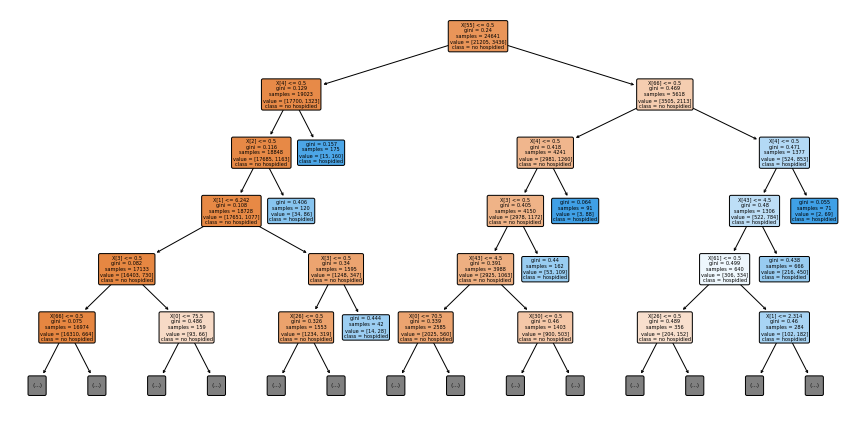

In [408]:
plt.figure(figsize= (15, 7.5))
plot_tree(final_pruned_tree,
          filled = True,
          rounded = True,
          class_names=["no hospidied", 'hospidied'],
          max_depth=5)
plt.savefig('final_pruned_tree.png',format='png',bbox_inches = "tight")

# Report *(10%)*

Report should be submitted as a pdf file! (**[STUDENT_ID]_report.pdf**)

*   List the top 3 splitting features and their thresholds of your model
*   Briefly describe how you build the decision tree
*   Describe if you apply any improvement on your decision tree model
*   If you preprocess the MIMIC data in the second part (selecting features...), describe the work and reasons
*   Summarize your work
*   Do not exceed 2 pages!






# Save the Code File
Please save your code and submit it as an ipynb file! (**[STUDENT_ID]_hw2.ipynb**)